In [532]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [533]:
df = pd.read_excel('data/monthly_avg.xlsx', parse_dates=['Date'], index_col='Date')
df.index = df.index.strftime('%m.%Y')
df = df.round(4)
df

,CHF,EUR,GPB,USD,AUD,UAH,NOK
Date,,,,,,,
06.2023,4.5448,4.4437,5.1751,4.0777,2.7129,0.1106,0.3779
07.2023,4.5988,4.4429,5.1749,4.0190,2.7063,0.1090,0.3913
08.2023,4.6529,4.4598,5.1946,4.0880,2.6514,0.1108,0.3908
09.2023,4.7908,4.5977,5.3353,4.3033,2.7645,0.1166,0.4013
10.2023,4.7249,4.5133,5.1986,4.2708,2.7136,0.1169,0.3886
11.2023,4.5668,4.3997,5.0545,4.0690,2.6442,0.1125,0.3729
12.2023,4.5883,4.3321,5.0269,3.9733,2.6552,0.1070,0.3758
01.2024,4.6625,4.3651,5.0839,4.0020,2.6600,0.1057,0.3849
02.2024,4.5747,4.3275,5.0646,4.0103,2.6177,0.1055,0.3800


In [534]:
#INVESTMENT_ANALYSIS_PLN_10000_(06.2023-06.2024):

In [535]:
## In this example investment, it is assumed that buying and selling were done at the market rate, 
## with an initial investment of 10,000 PLN.

In [536]:
returns = df.pct_change().dropna()
initial_investment = 10000
final_values = ((1 + returns).cumprod().iloc[-1])*initial_investment
investment_returns = ((final_values / initial_investment)-1) * 100
investment_risk = returns.std() * 100

investment_analysis = pd.DataFrame({
    'Final Value': final_values,
    'Return (%)': investment_returns,
    'Risk (%)': investment_risk
}).round(4)
investment_analysis

,Final Value,Return (%),Risk (%)
CHF,9885.5835,-1.1442,2.1404
EUR,9731.7551,-2.6824,1.4808
GPB,9870.9204,-1.2908,1.6118
USD,9839.3702,-1.6063,2.4855
AUD,9814.2209,-1.8578,1.8614
UAH,8969.2586,-10.3074,2.6529
NOK,10005.2924,0.0529,2.4390


In [537]:
investment_analysis.to_excel('data/investment_analysis.xlsx')

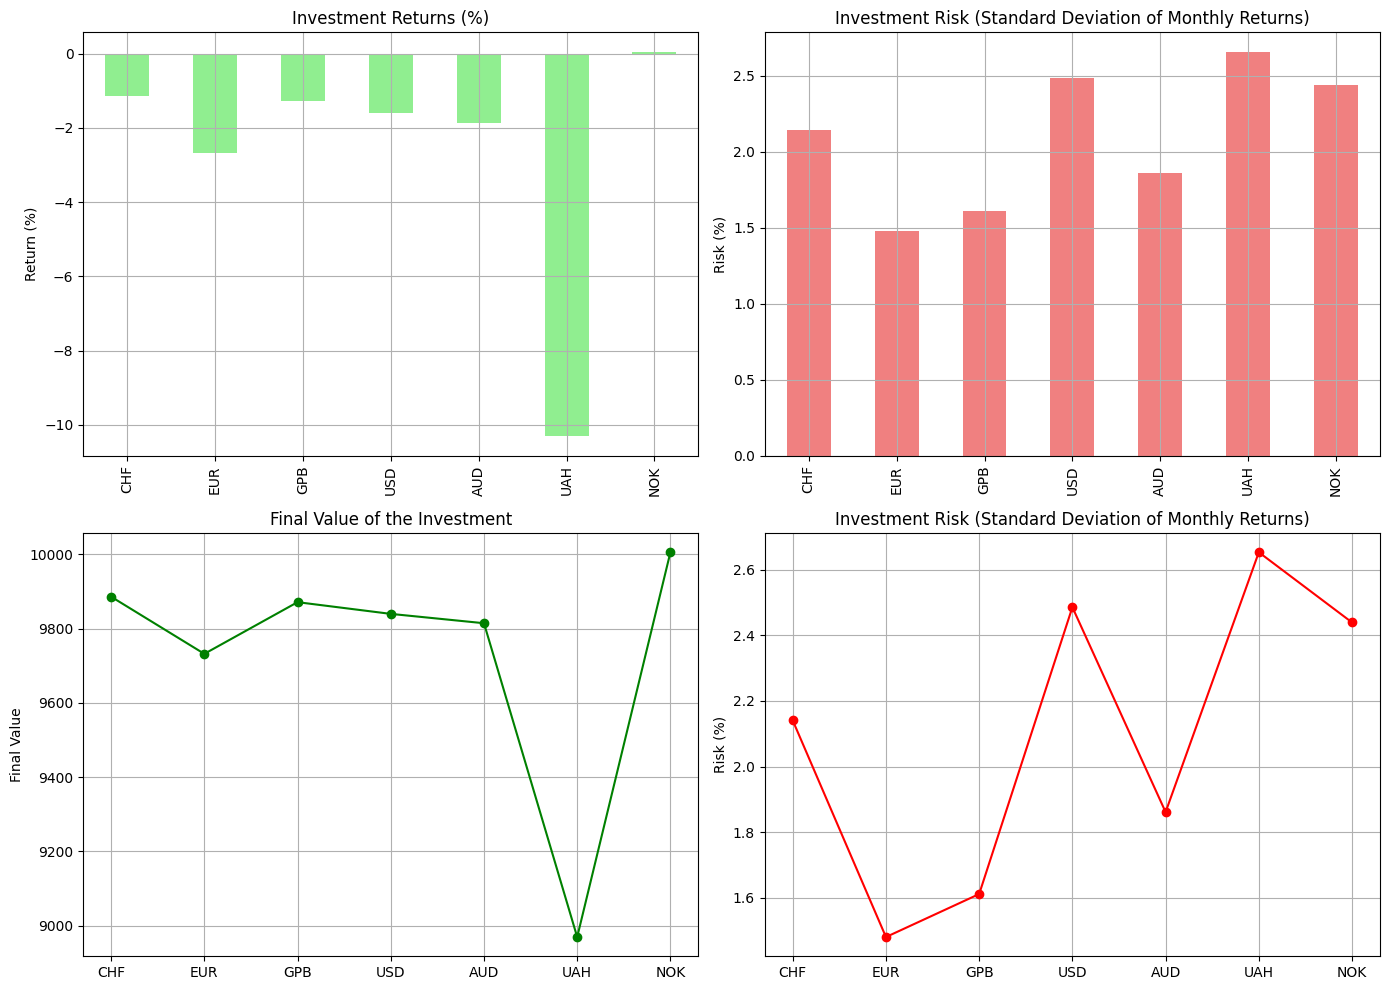

In [538]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
investment_returns.plot(kind='bar', color='lightgreen')
plt.title('Investment Returns (%)')
plt.ylabel('Return (%)')
plt.grid(True)

plt.subplot(2, 2, 2)
investment_risk.plot(kind='bar', color='lightcoral')
plt.title('Investment Risk (Standard Deviation of Monthly Returns)')
plt.ylabel('Risk (%)')
plt.grid(True)

plt.subplot(2, 2, 3) 
final_values.plot(style='-o', color='green')
plt.title('Final Value of the Investment')
plt.ylabel('Final Value')
plt.grid(True)

plt.subplot(2, 2, 4) 
investment_risk.plot(style='-o', color='red')  
plt.title('Investment Risk (Standard Deviation of Monthly Returns)')
plt.ylabel('Risk (%)')
plt.grid(True)

plt.tight_layout()
plt.savefig('data/investment_returns_and_risk.pdf')
plt.show()

In [539]:
# MINIMUM_AND_MAXIMUM_INVESTMENT_ANALYSIS_PLN_10000:

In [540]:
## In this example, monthly analyses were conducted for investments made in the months when the currency exchange rate was at its highest
## and lowest. An initial amount of 10,000 was assumed, with the purchase and sale prices of the currency being the same as the exchange 
## rate value.

In [541]:
high_low = pd.read_excel('data/high_low.xlsx', index_col=0)
percentage_changes = pd.read_excel('data/percent_changes.xlsx', index_col=0)

percentage_changes = percentage_changes.reset_index()

In [542]:
initial_investment = 10000
investment_results = []

for currency in high_low.index:
   
    max_date = high_low.loc[currency, 'max_date']
    max_value = high_low.loc[currency, 'max_value']
    min_date = high_low.loc[currency, 'min_date']
    min_value = high_low.loc[currency, 'min_value']
    
    max_change_row = percentage_changes.loc[percentage_changes['Date'] == max_date, currency]
    min_change_row = percentage_changes.loc[percentage_changes['Date'] == min_date, currency]
    
    if not max_change_row.empty:
        max_change = max_change_row.values[0]
        max_final_value = initial_investment*(1+(max_change / 100))
        max_profit = max_final_value - initial_investment
        max_return = (max_profit / initial_investment)*100
    else:
        max_change = None
        max_final_value = None
        max_profit = None
        max_return = None
    
    if not min_change_row.empty:
        min_change = min_change_row.values[0]
        min_final_value = initial_investment*(1+(min_change / 100))
        min_profit = min_final_value - initial_investment
        min_return = (min_profit / initial_investment)*100
    else:
        min_change = None
        min_final_value = None
        min_profit = None
        min_return = None
    
    investment_results.append({
        'Currency': currency,
        'Max Rate Month': max_date.strftime('%m.%Y') if isinstance(max_date, pd.Timestamp) else max_date,
        'Max Rate Value': max_value,
        'Max Rate Change (%)': max_change,
        'Final Value (Max Rate)': max_final_value,
        'Max Rate Profit': max_profit,
        'Max Rate Return (%)': max_return,
        'Min Rate Month': min_date.strftime('%m.%Y') if isinstance(min_date, pd.Timestamp) else min_date,
        'Min Rate Value': min_value,
        'Min Rate Change (%)': min_change,
        'Final Value (Min Rate)': min_final_value,
        'Min Rate Profit': min_profit,
        'Min Rate Return (%)': min_return
    })

min_max_investment_analysis = pd.DataFrame(investment_results)
min_max_investment_analysis.set_index('Currency', inplace=True)
min_max_investment_analysis

,Max Rate Month,Max Rate Value,Max Rate Change (%),Final Value (Max Rate),Max Rate Profit,Max Rate Return (%),Min Rate Month,Min Rate Value,Min Rate Change (%),Final Value (Min Rate),Min Rate Profit,Min Rate Return (%)
Currency,,,,,,,,,,,,
CHF,9.2023,4.7908,2.96,10296.0,296.0,2.96,5.2024,4.3533,-1.26,9874.0,-126.0,-1.26
EUR,9.2023,4.5977,3.09,10309.0,309.0,3.09,5.2024,4.2800,-0.53,9947.0,-53.0,-0.53
GPB,9.2023,5.3353,2.71,10271.0,271.0,2.71,5.2024,5.0006,-0.47,9953.0,-47.0,-0.47
USD,9.2023,4.3033,5.27,10527.0,527.0,5.27,5.2024,3.9585,-1.31,9869.0,-131.0,-1.31
AUD,9.2023,2.7645,4.27,10427.0,427.0,4.27,3.2024,2.5975,-0.77,9923.0,-77.0,-0.77
UAH,10.2023,0.1169,0.26,10026.0,26.0,0.26,6.2024,0.0992,-0.30,9970.0,-30.0,-0.30
NOK,9.2023,0.4013,2.69,10269.0,269.0,2.69,4.2024,0.3683,-1.45,9855.0,-145.0,-1.45


In [543]:
min_max_investment_analysis.to_excel('data/min_max_investment_analysis.xlsx')

<Figure size 1200x600 with 0 Axes>

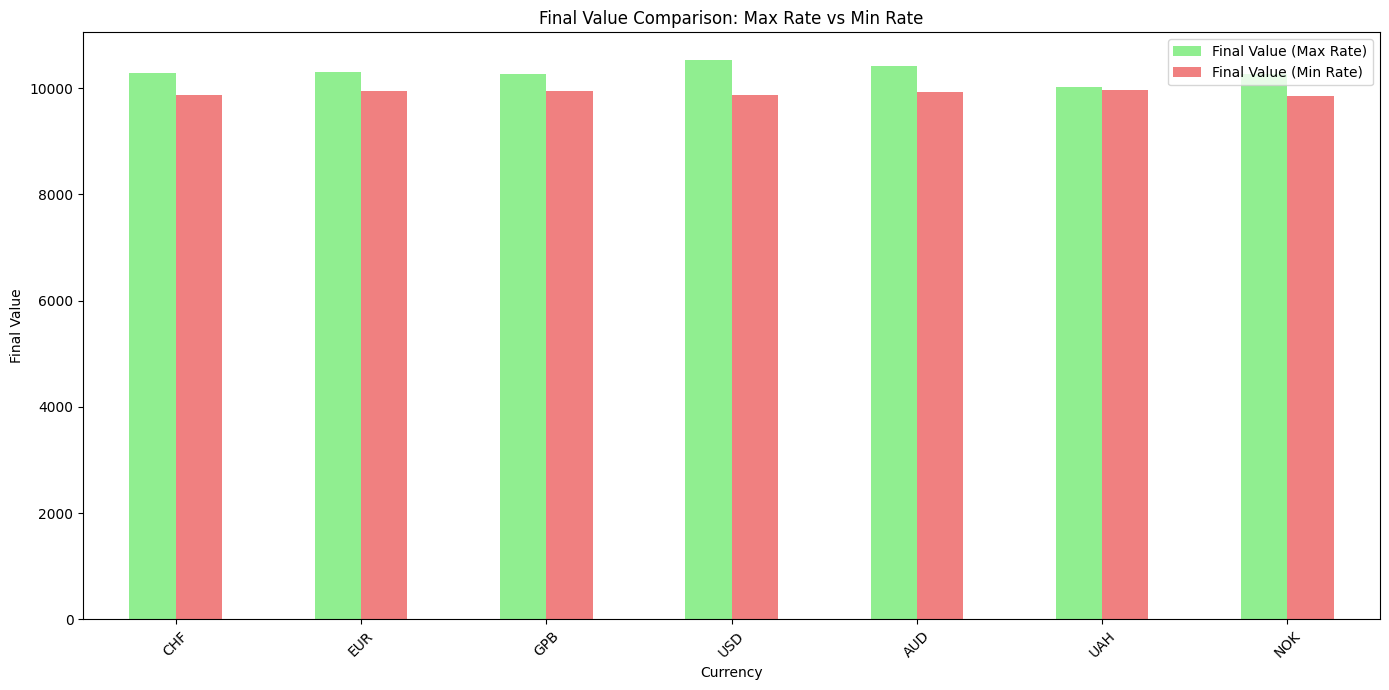

<Figure size 1200x600 with 0 Axes>

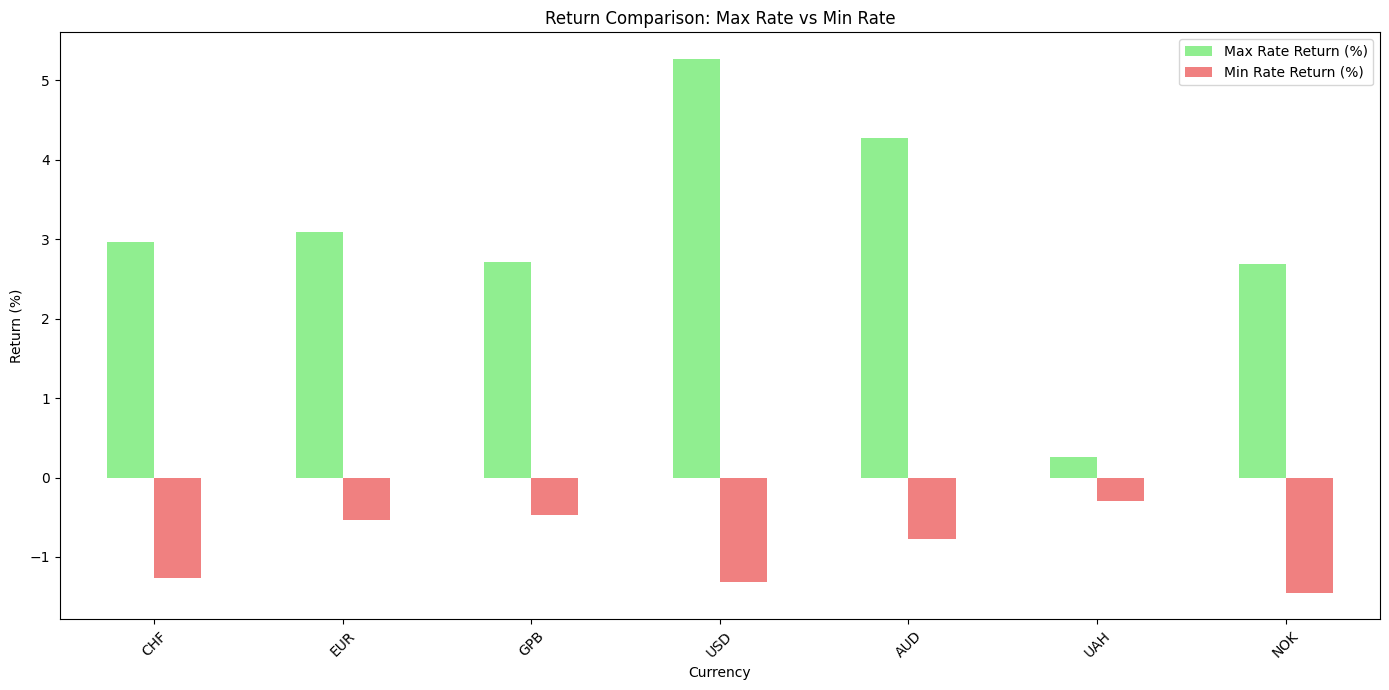

In [544]:
plt.figure(figsize=(12, 6))
ax = min_max_investment_analysis[['Final Value (Max Rate)', 'Final Value (Min Rate)']].plot(kind='bar', color=['lightgreen', 'lightcoral'], figsize=(14, 7))
plt.title('Final Value Comparison: Max Rate vs Min Rate')
plt.xlabel('Currency')
plt.ylabel('Final Value')
plt.xticks(rotation=45)
plt.legend(['Final Value (Max Rate)', 'Final Value (Min Rate)'])

plt.tight_layout()
plt.savefig('data/min_max_final_value_comparison.pdf')
plt.show()

plt.figure(figsize=(12, 6))
ax = min_max_investment_analysis[['Max Rate Return (%)', 'Min Rate Return (%)']].plot(kind='bar', color=['lightgreen', 'lightcoral'], figsize=(14, 7))
plt.title('Return Comparison: Max Rate vs Min Rate')
plt.xlabel('Currency')
plt.ylabel('Return (%)')
plt.xticks(rotation=45)
plt.legend(['Max Rate Return (%)', 'Min Rate Return (%)'])

plt.tight_layout()
plt.savefig('data/min_max_return_comparison.pdf')
plt.show()

In [545]:
# MOST_PROFITABLE_INVESTMENTS_IN_A_GIVEN_MONTH:

In [546]:
## In this example, we are identifying the most profitable investments for each month. 
## For each month, we start with an initial amount of 10,000 PLN.

In [547]:
monthly_avg = pd.read_excel('data/monthly_avg.xlsx', index_col='Date')
percent_changes = pd.read_excel('data/percent_changes.xlsx', index_col='Date')

In [548]:
initial_amount = 10000

investment_values = initial_amount * (1+(percent_changes / 100)).cumprod()

investment_profits = investment_values - initial_amount

average_monthly_profit = investment_profits.mean(axis=1)
monthly_profit_std_dev = investment_profits.std(axis=1)

best_investment_currency = percent_changes.idxmax(axis=1)
best_investment_value = percent_changes.max(axis=1)

monthly_investment_analysis = pd.DataFrame({
    'Best Investment Currency': best_investment_currency,
    'Percent Change': best_investment_value,
    'End Value': investment_values.max(axis=1),
    'Profit': investment_profits.max(axis=1),
    'Average Monthly Profit': average_monthly_profit,
    'Profit Std Dev (Risk)': monthly_profit_std_dev
})
monthly_investment_analysis[['End Value', 'Profit', 'Average Monthly Profit',
                             'Profit Std Dev (Risk)']] = monthly_investment_analysis[['End Value', 'Profit', 'Average Monthly Profit',
                                                                                      'Profit Std Dev (Risk)']].round(4)

monthly_investment_analysis

,Best Investment Currency,Percent Change,End Value,Profit,Average Monthly Profit,Profit Std Dev (Risk)
Date,,,,,,
7.2023,NOK,3.55,10355.0000,355.0000,22.7143,172.6825
8.2023,USD,1.72,10341.5385,341.5385,67.2219,181.1365
9.2023,USD,5.27,10619.7259,619.7259,443.3619,159.9960
10.2023,UAH,0.26,10568.9363,568.9363,275.4086,216.4199
11.2023,EUR,-2.52,10171.5443,171.5443,-74.1381,152.0948
12.2023,NOK,0.78,10094.9475,94.9475,-184.5552,150.4580
1.2024,NOK,2.42,10258.4856,258.4856,-104.7283,243.6442
2.2024,USD,0.21,10065.6261,65.6261,-190.0829,196.6109
3.2024,EUR,-0.46,9890.0114,-109.9886,-332.1670,208.8207


In [549]:
monthly_investment_analysis.to_excel('data/monthly_investment_analysis.xlsx')

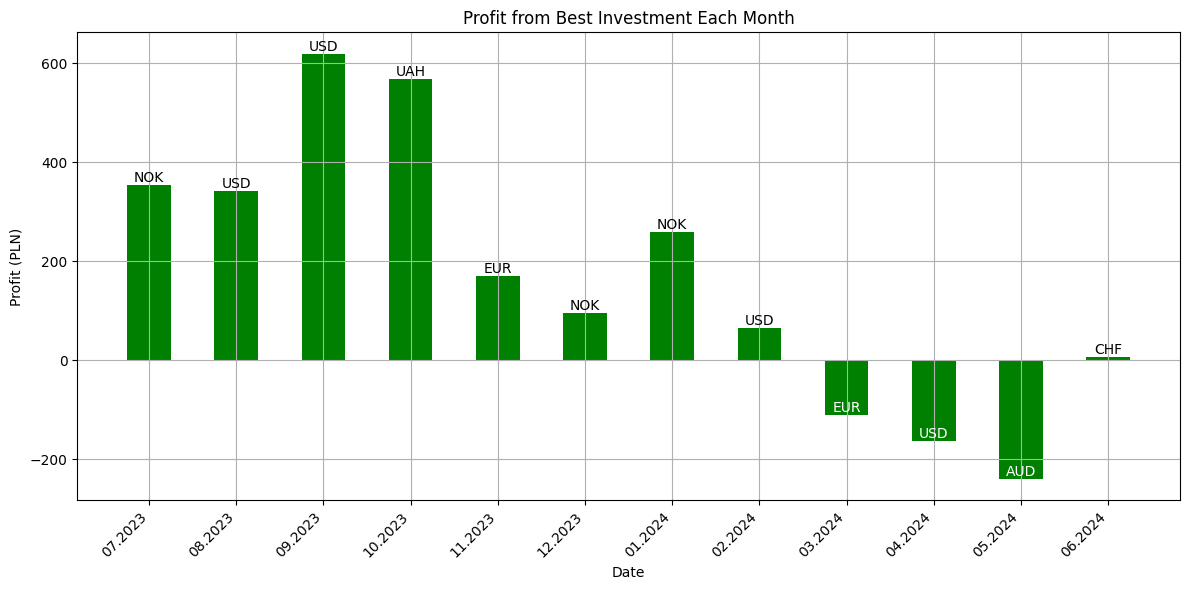

In [550]:
data = {
    'Best Investment Currency': ['NOK', 'USD', 'USD', 'UAH', 'EUR', 'NOK', 'NOK', 'USD', 'EUR', 'USD', 'AUD', 'CHF'],
    'Percent Change': [3.55, 1.72, 5.27, 0.26, -2.52, 0.78, 2.42, 0.21, -0.46, 1.20, 0.43, 3.20],
    'End Value': [10355.0000, 10341.5385, 10619.7259, 10568.9363, 10171.5443, 10094.9475, 10258.4856, 10065.6261, 9890.0114, 9837.0950, 9760.2515, 10006.2099],
    'Profit': [355.0000, 341.5385, 619.7259, 568.9363, 171.5443, 94.9475, 258.4856, 65.6261, -109.9886, -162.9050, -239.7485, 6.2099],
    'Average Monthly Profit': [22.7143, 67.2219, 443.3619, 275.4086, -74.1381, -184.5552, -104.7283, -190.0829, -332.1670, -355.7920, -427.3649, -268.8599],
    'Profit Std Dev (Risk)': [172.6825, 181.1365, 159.9960, 216.4199, 152.0948, 150.4580, 243.6442, 196.6109, 208.8207, 204.0860, 260.3534, 345.9103]
}
index = pd.to_datetime(['7.2023', '8.2023', '9.2023', '10.2023', '11.2023', '12.2023', '1.2024', '2.2024',
                        '3.2024', '4.2024', '5.2024', '6.2024'], format='%m.%Y')
monthly_investment_analysis = pd.DataFrame(data, index=index)

months = range(len(monthly_investment_analysis.index))

plt.figure(figsize=(12, 6))
bars = plt.bar(months, monthly_investment_analysis['Profit'], color='g', width=0.5)  
plt.title('Profit from Best Investment Each Month')
plt.xlabel('Date')
plt.ylabel('Profit (PLN)')
plt.grid(True)

plt.xticks(ticks=months, labels=monthly_investment_analysis.index.strftime('%m.%Y'), rotation=45, ha='right')

for bar, profit, label in zip(bars, monthly_investment_analysis['Profit'], monthly_investment_analysis['Best Investment Currency']):
    height = bar.get_height()
    color = 'white' if profit < 0 else 'black'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom', color=color)

plt.tight_layout()

plt.savefig('data/profit_monthly.pdf')
plt.show()

In [551]:
avg_df = pd.read_excel('data/monthly_avg.xlsx', parse_dates=['Date'], index_col='Date')
changes_df = pd.read_excel('data/percent_changes.xlsx', dtype=str)

avg_df.index = pd.to_datetime(avg_df.index, format='%m.%Y')
changes_df['Date'] = pd.to_datetime(changes_df['Date'], format='%m.%Y', errors='coerce')
changes_df.set_index('Date', inplace=True)

changes_df = changes_df.reindex(avg_df.index)

print(type(avg_df.index))
print(type(changes_df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [552]:
initial_investment = 10000
current_investment_value = initial_investment
investment_results = []

for current_date in avg_df.index[:-1]:
    try:
        next_date_index = avg_df.index.get_loc(current_date) + 1
        if next_date_index < len(avg_df.index):
            next_date = avg_df.index[next_date_index]

            if next_date in changes_df.index:
                changes = changes_df.loc[next_date]
                
                # Filtruj zmiany, aby usunąć NaN
                valid_changes = changes.dropna()

                if not valid_changes.empty:
                    best_currency = valid_changes.idxmax()
                    best_change = valid_changes.max()

                    if best_currency in avg_df.columns:
                        current_rate = avg_df.loc[current_date, best_currency]
                        next_rate = avg_df.loc[next_date, best_currency]
                        investment_value_next_month = (current_investment_value / current_rate) * next_rate

                        investment_results.append({
                            'Month': current_date,
                            'Best Currency': best_currency,
                            'Initial Value': current_investment_value,
                            'Value After Change': investment_value_next_month
                        })

                        current_investment_value = investment_value_next_month
                    else:
                        print(f"Currency {best_currency} not found in avg_df columns")
                else:
                    print(f"No valid changes for date {next_date}")
            else:
                print(f"Next date {next_date} not found in changes_df")
        else:
            print(f"No next date for {current_date}")
    except Exception as e:
        print(f"Error processing date {current_date}: {e}")

final_value_in_pln = current_investment_value / avg_df.loc[avg_df.index[-1], 'USD']
investment_results.append({
    'Month': avg_df.index[-1],
    'Best Currency': 'USD',
    'Initial Value': current_investment_value,
    'Value After Change': final_value_in_pln
})

investment_results_df = pd.DataFrame(investment_results)
print(investment_results_df)

No valid changes for date 2023-07-31 00:00:00
No valid changes for date 2023-08-31 00:00:00
No valid changes for date 2023-09-30 00:00:00
No valid changes for date 2023-10-31 00:00:00
No valid changes for date 2023-11-30 00:00:00
No valid changes for date 2023-12-31 00:00:00
No valid changes for date 2024-01-31 00:00:00
No valid changes for date 2024-02-29 00:00:00
No valid changes for date 2024-03-31 00:00:00
No valid changes for date 2024-04-30 00:00:00
No valid changes for date 2024-05-31 00:00:00
No valid changes for date 2024-06-30 00:00:00
       Month Best Currency  Initial Value  Value After Change
0 2024-06-30           USD          10000          2492.38162
